In [2]:
# 02_feature_engineering.ipynb
# Author: Onur Balic
# Description: Advanced feature engineering & node-level energy analysis

# ==========================
# Import necessary libraries
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ==========================
# Load dataset
# ==========================
df = pd.read_csv("../data/butter_e_energy.csv")

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Show basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDate range:", df["timestamp"].min(), "to", df["timestamp"].max())
df.head()

Shape: (1059206, 3)

Columns: ['timestamp', 'node', 'watts']

Date range: 2022-09-22 16:28:01+00:00 to 2022-09-30 09:30:01+00:00


,timestamp,node,watts
0,2022-09-24 08:20:01+00:00,r103u05,721
1,2022-09-24 08:21:01+00:00,r103u05,470
2,2022-09-24 08:22:01+00:00,r103u05,461
3,2022-09-24 08:23:01+00:00,r103u05,458
4,2022-09-24 08:24:01+00:00,r103u05,462


In [3]:
# ==========================
# Node-based energy summary
# ==========================

# Calculate total, mean, std for each node
node_stats = (
    df.groupby("node")["watts"]
    .agg(["count", "sum", "mean", "std"])
    .sort_values(by="sum", ascending=False)
    .reset_index()
)

# Rename columns for clarity
node_stats.columns = ["node", "num_records", "total_watts", "avg_watts", "std_watts"]

# Display top 10 nodes
print("Top 10 nodes by total energy consumption:")
node_stats.head(10)

Top 10 nodes by total energy consumption:


,node,num_records,total_watts,avg_watts,std_watts
0,r103u05,8640,3961083,458.458681,19.563932
1,r103u07,8641,3952718,457.437565,22.779195
2,r103u01,8641,3852723,445.865409,21.087375
3,r105u13,8640,3559254,411.950694,21.821013
4,r103u19,5760,2665153,462.700174,22.682499
5,r103u09,5761,2633529,457.130533,23.799881
6,r103u11,5761,2631888,456.845687,19.922218
7,r105u07,5760,2544882,441.819792,22.838406
8,r104u37,5760,2544861,441.816146,23.282066
9,r103u15,5670,2543201,448.536332,32.980310


/var/folders/b1/85fh_qc57qgf67hvb9qdc9zr0000gn/T/ipykernel_7145/989041343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_nodes, x="node", y="total_watts", palette="viridis")


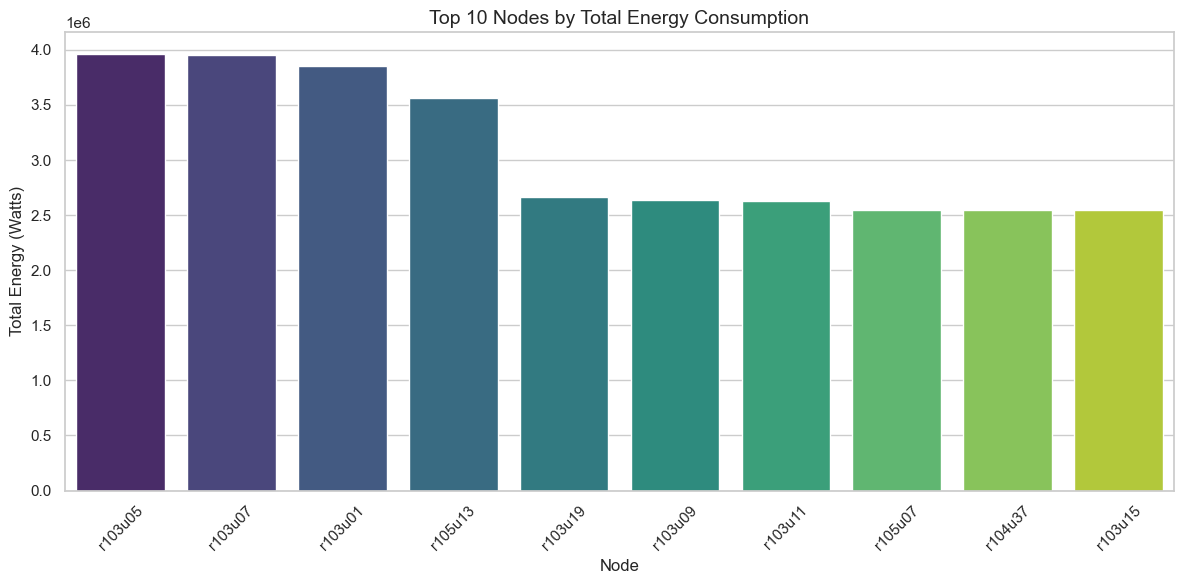

In [4]:
# ==========================
# Top 10 energy-consuming nodes
# ==========================
top10_nodes = node_stats.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_nodes, x="node", y="total_watts", palette="viridis")
plt.title("Top 10 Nodes by Total Energy Consumption", fontsize=14)
plt.xlabel("Node")
plt.ylabel("Total Energy (Watts)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/b1/85fh_qc57qgf67hvb9qdc9zr0000gn/T/ipykernel_7145/54968859.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["hour"] = df["timestamp"].dt.floor("H")


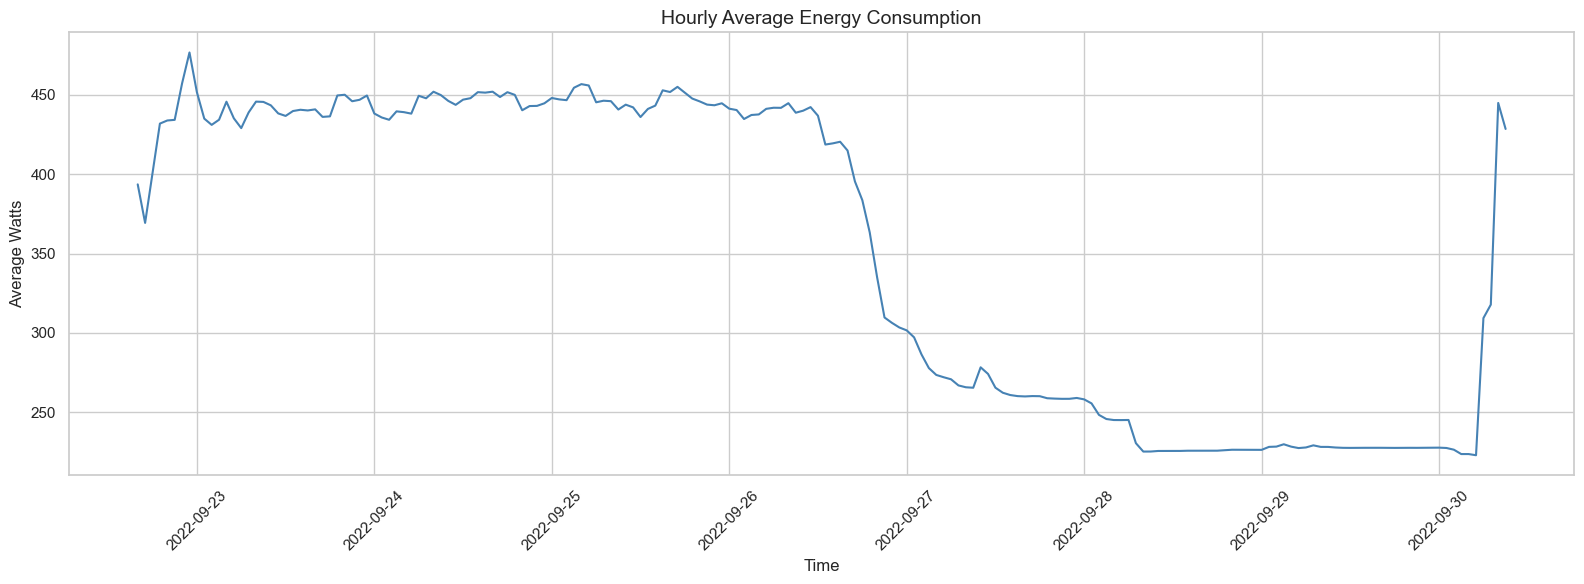

In [5]:
# ==========================
# Hourly average energy consumption
# ==========================

# Create a new column for hourly timestamps
df["hour"] = df["timestamp"].dt.floor("H")

# Group by hour and calculate average watts
hourly_avg = df.groupby("hour")["watts"].mean().reset_index()

# Plot the hourly trend
plt.figure(figsize=(16, 6))
plt.plot(hourly_avg["hour"], hourly_avg["watts"], color="steelblue")
plt.title("Hourly Average Energy Consumption", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Average Watts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/b1/85fh_qc57qgf67hvb9qdc9zr0000gn/T/ipykernel_7145/184957823.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_avg, x="date", y="watts", palette="mako")


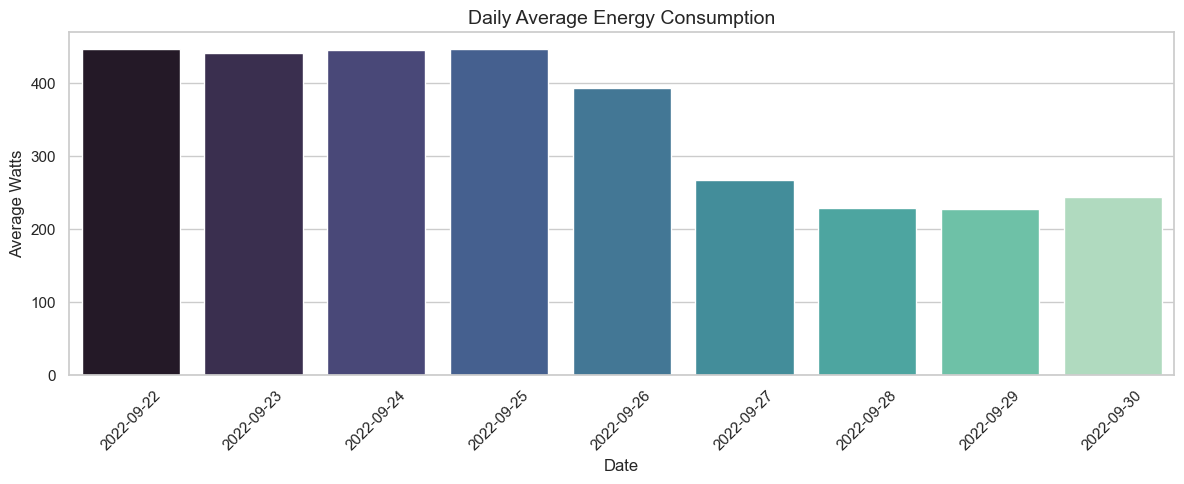

In [6]:
# ==========================
# Daily average energy consumption
# ==========================

# Create a new column for date
df["date"] = df["timestamp"].dt.date

# Group by date and calculate average watts
daily_avg = df.groupby("date")["watts"].mean().reset_index()

# Plot the daily trend
plt.figure(figsize=(12, 5))
sns.barplot(data=daily_avg, x="date", y="watts", palette="mako")
plt.title("Daily Average Energy Consumption", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Watts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

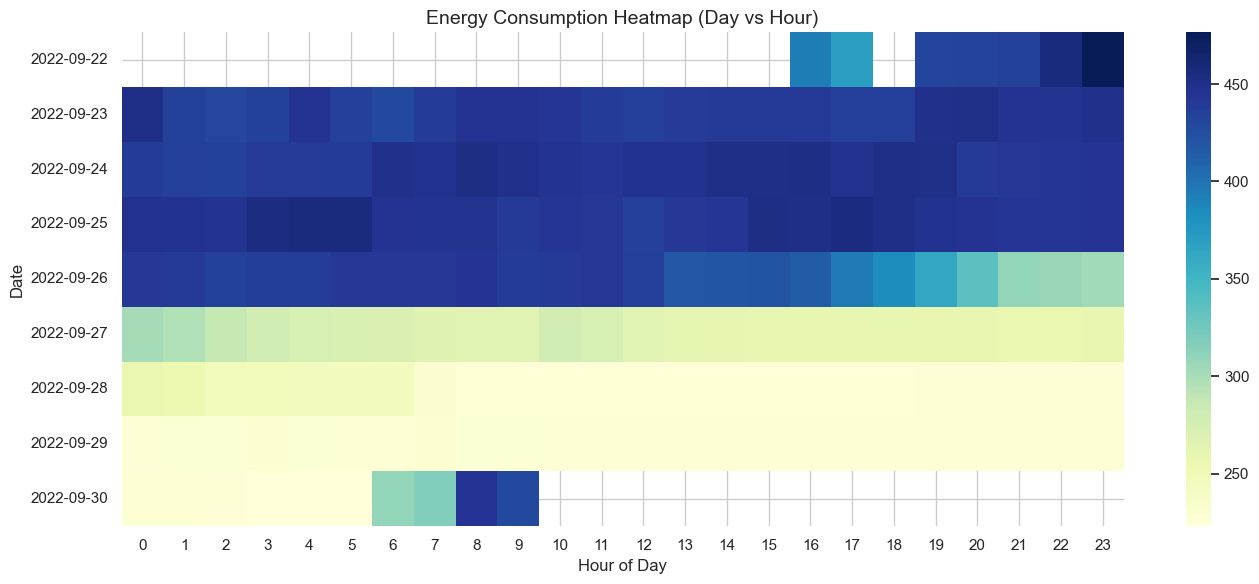

In [7]:
# ==========================
# Energy heatmap by day and hour
# ==========================

# Extract day and hour separately
df["day"] = df["timestamp"].dt.date
df["hour_of_day"] = df["timestamp"].dt.hour

# Calculate average watts for each day-hour combination
heatmap_data = df.groupby(["day", "hour_of_day"])["watts"].mean().unstack()

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Energy Consumption Heatmap (Day vs Hour)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.tight_layout()
plt.show()